## Final Project Submission

Please fill out:
* Student name: Levi Raichik
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


# Table of Contents

- [Import Libraries](#Import-Libraries)
- [Functions](#Functions)
- [Load in Dataset](#Load-in-Dataset)
- [Checkout the data](#Checkout-the-data)
- [Balancing out the dataset](#Balancing-out-the-dataset)
    - [Using SMOTE to balance out the dataset](#Using-SMOTE-to-balance-out-the-dataset)
    - [Using ADASYN to balance out the dataset](#Using-ADASYN-to-balance-out-the-dataset)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

[Return to contents](#Table-of-Contents)

## Functions

In [2]:
def cm(y_real, y_pred, t='test'):
    cf = confusion_matrix(y_real, y_pred)
    print(f"Confusion Matrix {t}: ")
    akws = {"ha": 'center',"va": 'top'}
    sns.heatmap(cf/(np.sum(cf)),annot=True, fmt='0.2%',cmap='Blues', annot_kws=akws, cbar=False)

    akws = {"ha": 'center',"va": 'bottom'}
    sns.heatmap(cf,annot=True, fmt='0',cmap='Blues', annot_kws=akws)
    plt.show()

## Load in Dataset

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


[Return to contents](#Table-of-Contents)

## Checkout the data

General Stats

In [4]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [412]:
df.loc[df['class'] == 1].describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.0
mean,26.251768,102.332390,437.971711,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597,1.0
std,14.228766,39.396993,42.848131,0.450035,0.351614,11.297719,68.576475,20.757110,11.658195,51.568859,19.618258,4.383293,49.685763,19.968555,2.235902,2.793187,2.550011,0.754057,1.815956,0.0
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,42.000000,2.130000,0.000000,0.000000,0.000000,0.000000,1.0
25%,15.000000,76.000000,411.500000,0.000000,0.000000,0.000000,153.500000,88.000000,26.095000,175.850000,86.500000,14.945000,171.750000,85.000000,7.730000,8.800000,2.000000,2.380000,1.000000,1.0
50%,26.000000,102.000000,415.000000,0.000000,0.000000,0.000000,215.900000,101.000000,36.700000,211.100000,99.000000,17.940000,206.300000,100.000000,9.280000,10.600000,4.000000,2.860000,2.000000,1.0
75%,38.000000,126.500000,510.000000,1.000000,0.000000,0.000000,266.450000,115.000000,45.295000,249.300000,113.500000,21.190000,240.850000,114.000000,10.840000,12.800000,5.000000,3.460000,4.000000,1.0
max,50.000000,225.000000,510.000000,1.000000,1.000000,48.000000,351.500000,165.000000,59.760000,363.700000,168.000000,30.910000,381.600000,158.000000,17.170000,20.000000,20.000000,5.400000,9.000000,1.0


In [413]:
df.loc[df['class'] == 0].describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.0
mean,25.956674,99.917074,436.736781,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722,0.0
std,14.897193,39.737531,42.105520,0.244469,0.451189,13.809408,49.634575,19.674019,8.437810,50.151854,19.862391,4.262900,50.609570,19.958820,2.277438,2.749994,2.438233,0.742443,1.164236,0.0
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,13.000000,73.000000,408.000000,0.000000,0.000000,0.000000,142.900000,87.000000,24.290000,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.500000,3.000000,2.300000,1.000000,0.0
50%,26.000000,99.000000,415.000000,0.000000,0.000000,0.000000,178.000000,100.000000,30.260000,199.500000,101.000000,16.960000,199.000000,100.000000,8.960000,10.300000,4.000000,2.780000,1.000000,0.0
75%,39.000000,127.000000,415.000000,0.000000,1.000000,20.000000,210.700000,113.000000,35.820000,232.300000,114.000000,19.750000,233.400000,113.000000,10.500000,12.000000,6.000000,3.240000,2.000000,0.0
max,50.000000,243.000000,510.000000,1.000000,1.000000,52.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,19.700000,19.000000,5.320000,8.000000,0.0


Seeing what the columns are and if there are any null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               

Checking the general distributions of the features

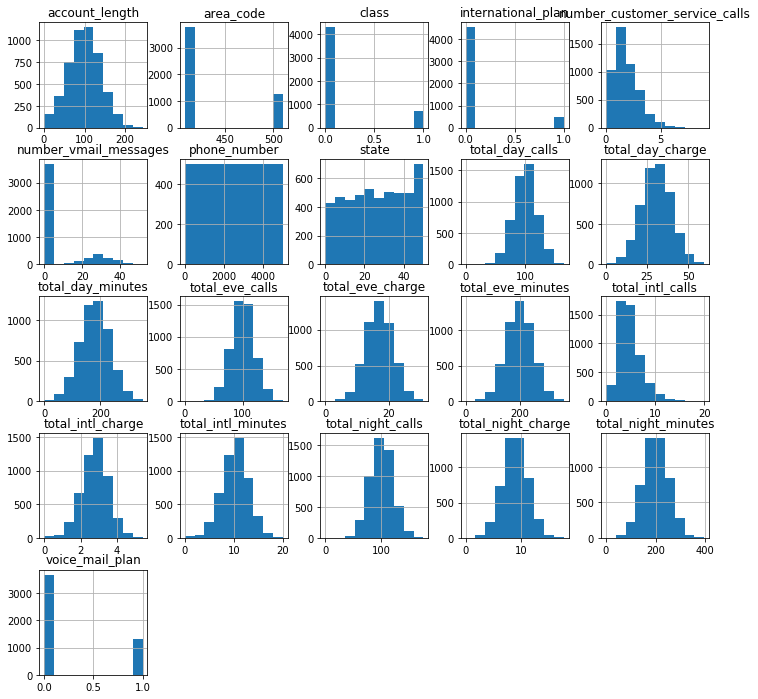

In [6]:
df.hist(figsize=(12,12));

Notice that we have very few cancellation customers. 

In [7]:
df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

Checking out a correlation matrix of the data

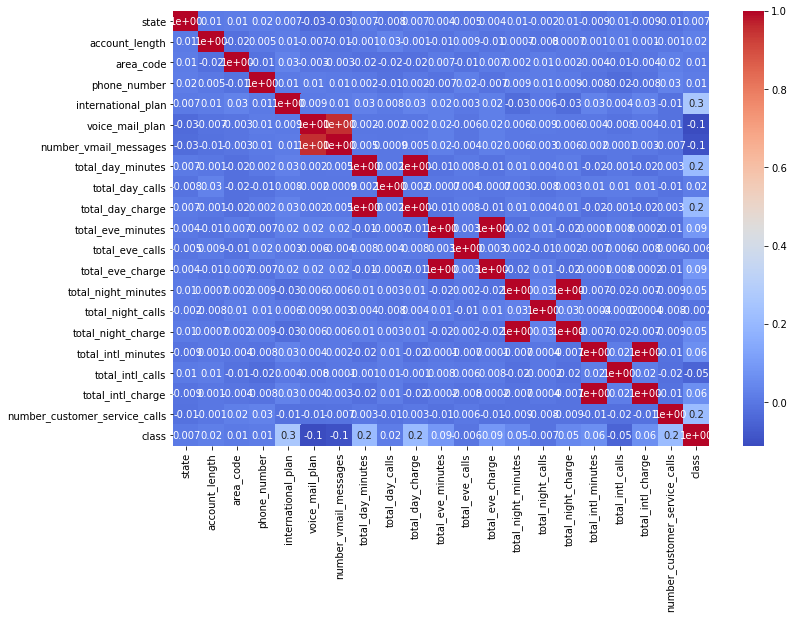

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1');

Checkout how many unique values there are for each feature

In [9]:
for col in df.columns:
    print(f'\n{col}')
    print(len(df[col].unique()))


state
51

account_length
218

area_code
3

phone_number
5000

international_plan
2

voice_mail_plan
2

number_vmail_messages
48

total_day_minutes
1961

total_day_calls
123

total_day_charge
1961

total_eve_minutes
1879

total_eve_calls
126

total_eve_charge
1659

total_night_minutes
1853

total_night_calls
131

total_night_charge
1028

total_intl_minutes
170

total_intl_calls
21

total_intl_charge
170

number_customer_service_calls
10

class
2


I will drop phone numbers as each one is different anyway

In [10]:
df = df.drop(['phone_number'], axis=1)
df.head(1)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


[Return to contents](#Table-of-Contents)

## Balancing out the dataset

First splitting the data

In [11]:
X = df.drop(['class'], axis=1)
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

Checking to make sure there are enough cancellation customers in the train and test split

In [13]:
y_test.value_counts()

0    861
1    139
Name: class, dtype: int64

In [14]:
y_train.value_counts()

0    3432
1     568
Name: class, dtype: int64

Seems to be fine

### Using SMOTE to balance out the dataset

In [15]:
sm = SMOTE(n_jobs=-1)

In [16]:
X_train_smoted, y_train_smoted = sm.fit_sample(X_train, y_train)

Try it with a baseline random forest

In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train_smoted, y_train_smoted)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
train_pred = rf.predict(X_train)
train_pred_smoted = rf.predict(X_train_smoted)
test_pred = rf.predict(X_test)

Confusion Matrix test: 


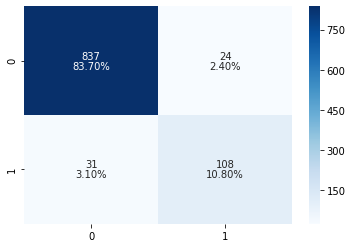

In [20]:
cm(y_test, test_pred)

Confusion Matrix train: 


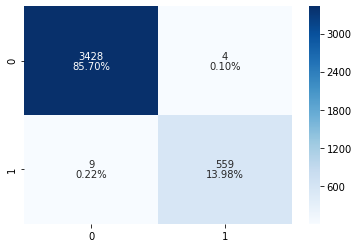

In [21]:
cm(y_train, train_pred, t='train')

Confusion Matrix train_smoted: 


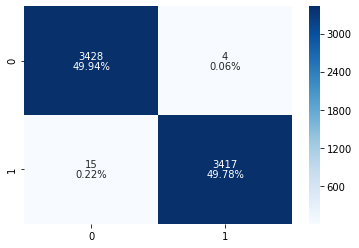

In [22]:
cm(y_train_smoted, train_pred_smoted, t='train_smoted')

Just playing with the probs a bit to see what I can change

In [23]:
test_predprobs = rf.predict_proba(X_test)

In [24]:
probs = []
for x in test_predprobs:
    if x[0] >= .65:
        probs.append(0)
    else:
        probs.append(1)   
        

Confusion Matrix test: 


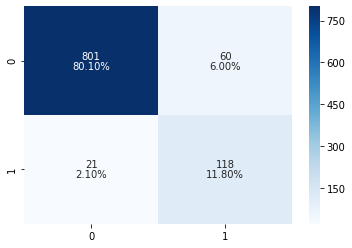

In [25]:
cm(y_test, probs, t='test')

In [26]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       861
           1       0.82      0.78      0.80       139

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.89      0.87      0.88      1000
weighted avg       0.94      0.94      0.94      1000



Try it with baseline logistic regression

In [27]:
scaler = StandardScaler()
logreg = LogisticRegression(n_jobs=-1)

In [28]:
Xtrain_scaled_sm = scaler.fit_transform(X_train_smoted)
Xtest_scaled = scaler.fit_transform(X_test)
logreg.fit(Xtrain_scaled_sm, y_train_smoted)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
ytest_preds = logreg.predict(Xtest_scaled)
ytrain_preds = logreg.predict(X_train_scaled)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Confusion Matrix test: 


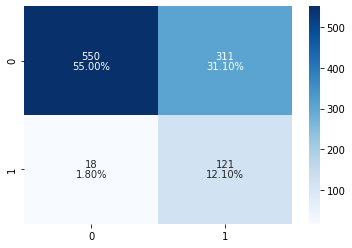

In [30]:
cm(y_test, ytest_preds, t='test')

Confusion Matrix train: 


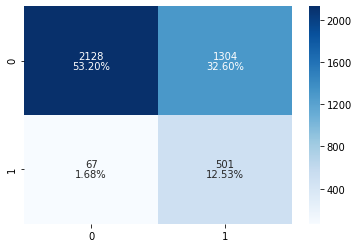

In [31]:
cm(y_train, ytrain_preds, t='train')

In [32]:
print(classification_report(y_test, ytest_preds))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       861
           1       0.28      0.87      0.42       139

   micro avg       0.67      0.67      0.67      1000
   macro avg       0.62      0.75      0.60      1000
weighted avg       0.87      0.67      0.72      1000



[Return to contents](#Table-of-Contents)

## Using ADASYN to balance out the dataset

In [33]:
smad = ADASYN()

In [34]:
X_train_smad, y_train_smad = smad.fit_sample(X_train, y_train)

In [35]:
rf.fit(X_train_smad, y_train_smad)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
train_pred2 = rf.predict(X_train)
train_pred_smad = rf.predict(X_train_smad)
test_pred2 = rf.predict(X_test)

Confusion Matrix test: 


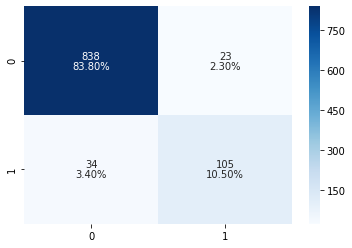

In [37]:
cm(y_test, test_pred2)

Confusion Matrix train: 


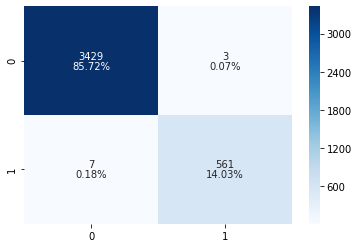

In [38]:
cm(y_train, train_pred2, t='train')

Confusion Matrix train_smoted: 


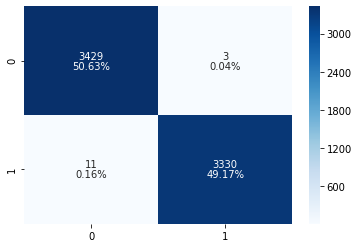

In [39]:
cm(y_train_smad, train_pred_smad, t='train_smoted')

In [40]:
print(classification_report(y_test, test_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       861
           1       0.82      0.76      0.79       139

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.89      0.86      0.88      1000
weighted avg       0.94      0.94      0.94      1000



Try it with baseline logistic regression

In [41]:
Xtrain_scaled_smad = scaler.fit_transform(X_train_smad)
Xtest_scaled = scaler.fit_transform(X_test)
logreg.fit(Xtrain_scaled_smad, y_train_smad)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
ytest_preds = logreg.predict(Xtest_scaled)
ytrain_preds = logreg.predict(X_train_scaled)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Confusion Matrix test: 


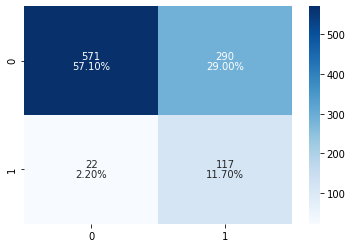

In [43]:
cm(y_test, ytest_preds, t='test')

Confusion Matrix test: 


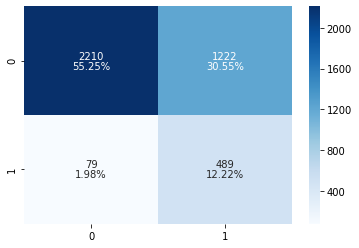

In [44]:
cm(y_train, ytrain_preds)

In [45]:
print(classification_report(y_test, ytest_preds))

              precision    recall  f1-score   support

           0       0.96      0.66      0.79       861
           1       0.29      0.84      0.43       139

   micro avg       0.69      0.69      0.69      1000
   macro avg       0.63      0.75      0.61      1000
weighted avg       0.87      0.69      0.74      1000



[Return to contents](#Table-of-Contents)

## Going into Random forests more to see how it can best be optimized

GridsearchCV

In [46]:
clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10,50,100],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_leaf": [10, 11, 12, 15],
    "min_impurity_decrease": [.0001, .001, .01]
}
gs_tree = GridSearchCV(clf, param_grid, cv=5, scoring='recall',  n_jobs=-1, verbose=2)
gs_tree.fit(X_train_smoted, y_train_smoted)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 10], 'min_samples_leaf': [10, 11, 12, 15], 'min_impurity_decrease': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [47]:
rf_gs = pd.DataFrame(gs_tree.cv_results_)
rf_gs.head()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.123398,0.031589,0.017599,0.016658,gini,1,0.0001,10,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.685897,0.043143,277,0.718397,0.688160,0.688638,0.668973,0.649672,0.682768,0.022885
1,0.538797,0.028826,0.020402,0.013322,gini,1,0.0001,10,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.745338,0.051672,223,0.798907,0.789435,0.693736,0.757465,0.687910,0.745491,0.046737
2,1.042198,0.044887,0.038400,0.013500,gini,1,0.0001,10,100,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.738345,0.087114,233,0.719854,0.688525,0.809905,0.802622,0.659505,0.736082,0.060443
3,0.120398,0.018447,0.004200,0.000398,gini,1,0.0001,11,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.712121,0.106223,260,0.718033,0.861202,0.775674,0.630007,0.605244,0.718032,0.094117
4,0.533799,0.030819,0.021399,0.016801,gini,1,0.0001,11,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.736597,0.118740,235,0.680874,0.798543,0.763292,0.832484,0.649308,0.744900,0.069461


In [48]:
rf_gs.sort_values(by=['mean_test_score'], ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
260,4.216798,0.877735,0.062802,0.020961,entropy,10,0.0001,12,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.917541,0.048612,1,0.950820,0.931148,0.931537,0.923889,0.928259,0.933131,0.009258
269,4.042799,0.756946,0.061000,0.009381,entropy,10,0.001,11,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.917249,0.051432,2,0.952277,0.928233,0.929716,0.925710,0.926803,0.932548,0.009956
110,2.870999,0.522448,0.061601,0.014760,gini,10,0.0001,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.916958,0.052232,3,0.951184,0.931148,0.928623,0.932265,0.932265,0.935097,0.008153
254,4.167199,0.873366,0.060201,0.017268,entropy,10,0.0001,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.916958,0.050709,3,0.957741,0.932240,0.930808,0.933358,0.926438,0.936117,0.011064
271,2.001000,0.413672,0.027402,0.021304,entropy,10,0.001,12,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.916084,0.044574,5,0.946812,0.927505,0.928259,0.924982,0.927167,0.930945,0.008008


In [49]:
gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_impurity_decrease': 0.0001,
 'min_samples_leaf': 12,
 'n_estimators': 100}

In [50]:
rf2 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=10, min_impurity_decrease=.0001, min_samples_leaf=11)
rf2.fit(X_train_smoted, y_train_smoted)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
train_pred2 = rf2.predict(X_train)
train_pred_smoted2 = rf2.predict(X_train_smoted)
test_pred2 = rf2.predict(X_test)

Confusion Matrix test: 


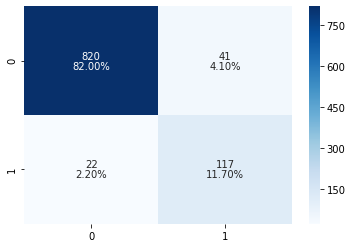

In [52]:
cm(y_test, test_pred2)

In [53]:
indices = []
for i, true, pred in zip(y_test.index, y_test.values, test_pred2):
    if pred == 0 and true == 1:
        indices.append(i)

In [54]:
print(indices)

[2468, 2377, 4257, 84, 3601, 2819, 2575, 4624, 2357, 4996, 3382, 1534, 2405, 4112, 1965, 4324, 1115, 2934, 3409, 1746, 4210, 2925]


(array([6., 6., 1., 4., 1., 0., 0., 0., 0., 4.]),
 array([0.03661541, 0.08132869, 0.12604197, 0.17075525, 0.21546854,
        0.26018182, 0.3048951 , 0.34960838, 0.39432166, 0.43903494,
        0.48374822]),
 <a list of 10 Patch objects>)

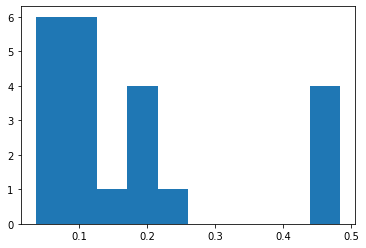

In [55]:
plt.hist(rf2.predict_proba(X.loc[indices])[:, 1])

In [56]:
fn_probs = rf2.predict_proba(X.loc[indices])[:, 1]

In [57]:
np.where(fn_probs>.2)

(array([ 0,  2,  3, 10, 11, 14, 15], dtype=int64),)

In [58]:
print(sorted(fn_probs))

[0.036615413558549546, 0.03847349942633764, 0.04863342863282722, 0.04932459854127025, 0.05066260644326238, 0.07229886090666705, 0.09674936841002664, 0.10126224085647634, 0.11379848671061071, 0.11397882342916942, 0.11534798293171607, 0.1202882894012979, 0.14036158204431032, 0.17090801760122637, 0.19149069166525445, 0.203341361178471, 0.2057318291755294, 0.2505859394570988, 0.46832715827584503, 0.47558395106112145, 0.4829594139147829, 0.4837482173292749]


In [59]:
probs = []
for i in rf2.predict_proba(X_test):
    if i[1] >=.27:
        probs.append(1)
    else:
        probs.append(0)

Confusion Matrix test: 


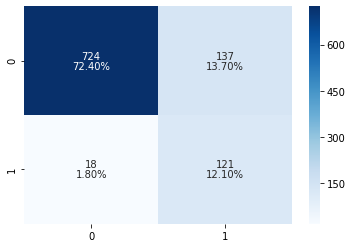

In [60]:
cm(y_test, probs)

Confusion Matrix train: 


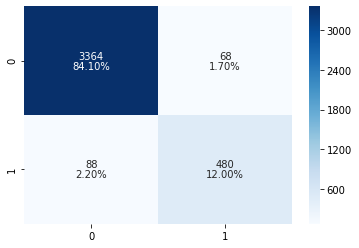

In [61]:
cm(y_train, train_pred2, t='train')

Confusion Matrix train_smoted: 


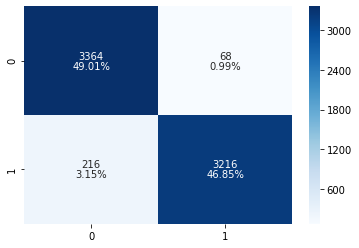

In [62]:
cm(y_train_smoted, train_pred_smoted2, t='train_smoted')

In [63]:
print(classification_report(y_test, test_pred2))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       861
           1       0.74      0.84      0.79       139

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.86      0.90      0.88      1000
weighted avg       0.94      0.94      0.94      1000



In [64]:
print(classification_report(y_train, train_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3432
           1       0.88      0.85      0.86       568

   micro avg       0.96      0.96      0.96      4000
   macro avg       0.93      0.91      0.92      4000
weighted avg       0.96      0.96      0.96      4000



Optimizing with LDA

In [65]:
lda = LinearDiscriminantAnalysis(solver='eigen', n_components=3)

In [66]:
new_x = lda.fit_transform(X, y)

In [67]:
new_x.shape

(5000, 1)

In [68]:
lda.explained_variance_ratio_

array([1.00000005])

In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_x,y,test_size=.2)

In [70]:
X_train_smoted2, y_train_smoted2 = sm.fit_sample(X_train2, y_train2)

In [71]:
clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10,50,100],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_leaf": [10, 11, 12, 15],
    "min_impurity_decrease": [.0001, .001, .01]
}
gs_tree = GridSearchCV(clf, param_grid, cv=5, scoring='recall',  n_jobs=-1, verbose=2)
gs_tree.fit(X_train_smoted2, y_train_smoted2)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 10], 'min_samples_leaf': [10, 11, 12, 15], 'min_impurity_decrease': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [72]:
rf_gs2 = pd.DataFrame(gs_tree.cv_results_)
rf_gs2.head()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040401,0.000800,0.004400,0.000490,gini,1,0.0001,10,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.844737,0.008187,4,0.845029,0.846126,0.846857,0.846126,0.842471,0.845322,0.001540
1,0.392202,0.042071,0.015997,0.006541,gini,1,0.0001,10,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.844737,0.008187,4,0.843933,0.845760,0.847222,0.846126,0.841740,0.844956,0.001926
2,0.684199,0.105022,0.050799,0.014782,gini,1,0.0001,10,100,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.844737,0.008187,4,0.843933,0.845760,0.846857,0.846126,0.841740,0.844883,0.001843
3,0.086800,0.016871,0.003800,0.000400,gini,1,0.0001,11,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.844737,0.008187,4,0.843567,0.845760,0.847222,0.846126,0.841740,0.844883,0.001970
4,0.441400,0.011074,0.033601,0.016894,gini,1,0.0001,11,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.844737,0.008187,4,0.843933,0.845760,0.847222,0.846126,0.841740,0.844956,0.001926


In [73]:
rf_gs2.sort_values(by=['mean_test_score'], ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
150,0.100401,0.021192,0.011800,0.015600,entropy,1,0.0001,12,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",...,0.845322,0.007535,1,0.843933,0.846126,0.849050,0.846126,0.841740,0.845395,0.002446
171,0.077198,0.010776,0.004600,0.000800,entropy,1,0.01,11,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",...,0.845029,0.007846,2,0.845395,0.846126,0.847588,0.846126,0.841740,0.845395,0.001961
175,0.363796,0.056691,0.038202,0.017612,entropy,1,0.01,12,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",...,0.845029,0.008061,2,0.845029,0.846126,0.846857,0.846491,0.841740,0.845249,0.001858
0,0.040401,0.000800,0.004400,0.000490,gini,1,0.0001,10,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.844737,0.008187,4,0.845029,0.846126,0.846857,0.846126,0.842471,0.845322,0.001540
155,0.730599,0.141442,0.034801,0.009785,entropy,1,0.0001,15,100,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",...,0.844737,0.008187,4,0.845029,0.846126,0.847222,0.846126,0.841740,0.845249,0.001886


In [74]:
gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'min_impurity_decrease': 0.0001,
 'min_samples_leaf': 12,
 'n_estimators': 10}

In [75]:
rf3 = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=1, min_impurity_decrease=.001, min_samples_leaf=12)
rf3.fit(X_train_smoted2, y_train_smoted2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
train_pred3 = rf3.predict(X_train2)
train_pred_smoted3 = rf3.predict(X_train_smoted2)
test_pred3 = rf3.predict(X_test2)

Confusion Matrix test: 


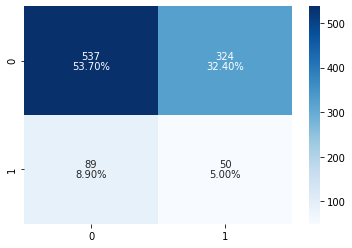

In [77]:
cm(y_test, test_pred3)

In [78]:
indices2 = []
for i, true, pred in zip(y_test.index, y_test.values, test_pred3):
    if pred == 0 and true == 1:
        indices2.append(i)

In [79]:
print(indices2)

[2468, 3585, 2099, 4121, 4628, 2451, 2377, 4257, 655, 465, 4062, 2575, 144, 2029, 2696, 4328, 2357, 911, 3525, 626, 4917, 3686, 3268, 3064, 1405, 1869, 416, 977, 2187, 4120, 69, 859, 3630, 2882, 2594, 721, 3382, 2164, 2964, 354, 1534, 4112, 2924, 3617, 3665, 584, 2614, 1192, 1662, 415, 4324, 4190, 3247, 3002, 4093, 4258, 1954, 1392, 4773, 3692, 3822, 2664, 2347, 378, 1344, 3409, 3986, 4918, 3973, 1746, 1322, 218, 4650, 3688, 1018, 2526, 2118, 1345, 4210, 2602, 4023, 4772, 1694, 2059, 2925, 3754, 3148, 4939, 944]


(array([14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 74.]),
 array([0.17884056, 0.23550083, 0.29216111, 0.34882138, 0.40548166,
        0.46214193, 0.5188022 , 0.57546248, 0.63212275, 0.68878303,
        0.7454433 ]),
 <a list of 10 Patch objects>)

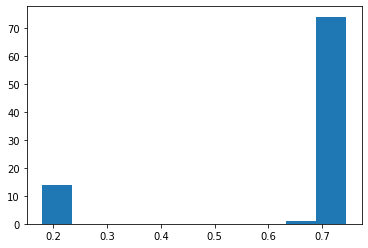

In [80]:
plt.hist(rf3.predict_proba(new_x[indices2])[:, 1])

In [81]:
fn_probs2 = rf3.predict_proba(new_x[indices2])[:, 1]

In [82]:
len(np.where(fn_probs2>.2)[0])

75

In [83]:
print(sorted(fn_probs2))

[0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.17884056066426807, 0.6341495080823301, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.7454432993975857, 0.745

Trying with balanced bagging

In [84]:
bag = BalancedBaggingClassifier(base_estimator=rf2, verbose=2, n_jobs=-1, n_estimators=50)

In [85]:
bag.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    3.1s remaining:    5.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.0s finished


BalancedBaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
             random_state=None, ratio=None, replacement=False,
             sampling_strategy='auto', verbose=2, warm_start=False)

In [86]:
train_predb = bag.predict(X_train)
test_predb = bag.predict(X_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.7s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.6s finished


Confusion Matrix test: 


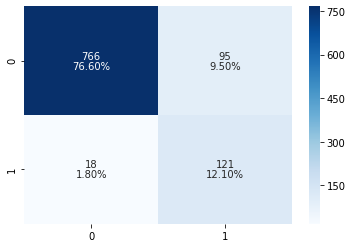

In [87]:
cm(y_test, test_predb)

Confusion Matrix train: 


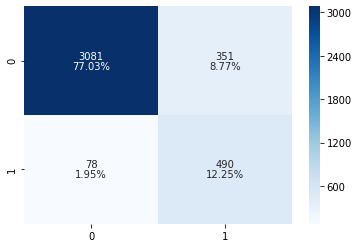

In [88]:
cm(y_train, train_predb, t='train')

In [89]:
indices3 = []
for i, true, pred in zip(y_test.index, y_test.values, test_predb):
    if pred == 0 and true == 1:
        indices3.append(i)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.7s finished


(array([2., 4., 2., 0., 1., 1., 4., 0., 2., 2.]),
 array([0.1303786 , 0.15276301, 0.17514743, 0.19753184, 0.21991625,
        0.24230066, 0.26468507, 0.28706949, 0.3094539 , 0.33183831,
        0.35422272]),
 <a list of 10 Patch objects>)

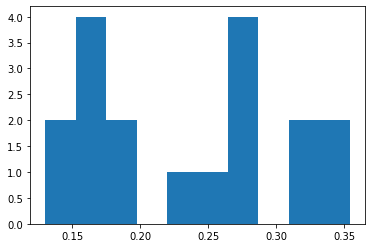

In [90]:
plt.hist(bag.predict_proba(X.loc[indices3])[:, 1])

In [91]:
fn_probs3 = bag.predict_proba(X.loc[indices3])[:, 1]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.6s finished


In [92]:
np.where(fn_probs>.2)

(array([ 0,  2,  3, 10, 11, 14, 15], dtype=int64),)

In [93]:
print(sorted(fn_probs3))

[0.13037860295241088, 0.1371708615589218, 0.15867215244244043, 0.16079393575212045, 0.16112404995632695, 0.16468565753314293, 0.17721069607189358, 0.19454694492131214, 0.22177935490813933, 0.25887040866933475, 0.2731463780242844, 0.2779862819664698, 0.28314276564302626, 0.284844183785455, 0.3304286280139061, 0.3313365084449947, 0.34684812112913943, 0.3542227211599326]


In [94]:
probs3 = []
for i in bag.predict_proba(X_test):
    if i[1] >=.38:
        probs3.append(1)
    else:
        probs3.append(0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.6s finished


Confusion Matrix test: 


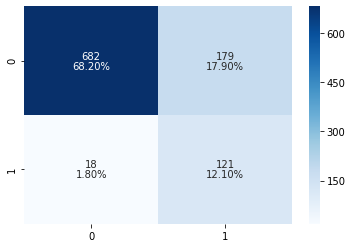

In [95]:
cm(y_test, probs3)

In [96]:
kfold = KFold(n_splits=8)

In [97]:
cross_val_score(bag, X, y, verbose=2, scoring='recall', cv=kfold, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   19.5s remaining:   32.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   20.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   20.3s finished


array([0.84090909, 0.84615385, 0.8125    , 0.89795918, 0.83333333,
       0.87777778, 0.82417582, 0.92207792])

In [98]:
array = np.array([0.84090909, 0.84615385, 0.8125, 0.89795918, 0.84313725,0.87777778, 0.82417582, 0.92207792])

In [99]:
array.mean()

0.85808636125

Regular bagging with the smoted data

In [100]:
bagreg = BaggingClassifier(base_estimator=rf2, n_jobs=-1, n_estimators=50)

In [101]:
bagreg.fit(X_train_smoted, y_train_smoted)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [102]:
train_predb = bagreg.predict(X_train)
test_predb = bagreg.predict(X_test)

Confusion Matrix test: 


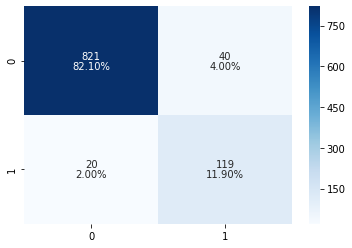

In [103]:
cm(y_test, test_predb)

Confusion Matrix train: 


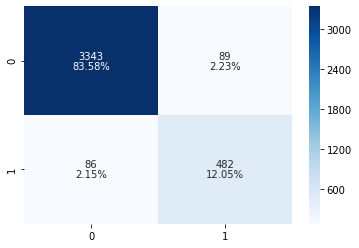

In [104]:
cm(y_train, train_predb, t='train')

In [105]:
print(classification_report(y_test, test_predb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       861
           1       0.75      0.86      0.80       139

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.86      0.90      0.88      1000
weighted avg       0.94      0.94      0.94      1000



In [106]:
indices3 = []
for i, true, pred in zip(y_test.index, y_test.values, test_predb):
    if pred == 0 and true == 1:
        indices3.append(i)

(array([7., 4., 3., 2., 2., 0., 0., 0., 0., 2.]),
 array([0.0486101 , 0.09335932, 0.13810855, 0.18285777, 0.227607  ,
        0.27235622, 0.31710544, 0.36185467, 0.40660389, 0.45135312,
        0.49610234]),
 <a list of 10 Patch objects>)

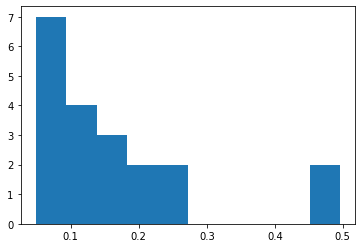

In [107]:
plt.hist(bagreg.predict_proba(X.loc[indices3])[:, 1])

In [108]:
fn_probs3 = bagreg.predict_proba(X.loc[indices3])[:, 1]

In [109]:
np.where(fn_probs3>.35)

(array([0, 2], dtype=int64),)

In [110]:
print(sorted(fn_probs3))

[0.04861009927491551, 0.07019379047032415, 0.07030273131088602, 0.07915401978848685, 0.0792969567330649, 0.08152937092870677, 0.08766242449309238, 0.10089068075189057, 0.10949778545385515, 0.11034072710117318, 0.11974131054228067, 0.14264507335124177, 0.14647986084317732, 0.1754121782686027, 0.1997855747269154, 0.20932777148992135, 0.2322445494348196, 0.26933920503919295, 0.4904041583121561, 0.4961023400259854]


In [111]:
probs3 = []
for i in bagreg.predict_proba(X_test):
    if i[1] >=.42:
        probs3.append(1)
    else:
        probs3.append(0)

Confusion Matrix test: 


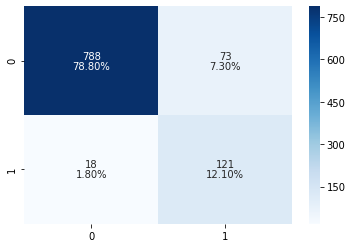

In [112]:
cm(y_test, probs3)

In [113]:
print(classification_report(y_test, probs3))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       861
           1       0.62      0.87      0.73       139

   micro avg       0.91      0.91      0.91      1000
   macro avg       0.80      0.89      0.84      1000
weighted avg       0.93      0.91      0.92      1000



Trying cross val with smoted data

In [114]:
kf = KFold(n_splits=5)

In [115]:
for train_index, test_index in kf.split(X, y):
    print(len(train_index), len(test_index))

4000 1000
4000 1000
4000 1000
4000 1000
4000 1000


In [116]:
X_trains = {}
X_tests = {}
y_trains = {}
y_tests = {}
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(i)
    print(train_index)
    X_trains[i] = X.loc[train_index]
    X_tests[i] = X.loc[test_index]
    y_trains[i] = y[train_index]
    y_tests[i] = y[test_index]

0
[1000 1001 1002 ... 4997 4998 4999]
1
[   0    1    2 ... 4997 4998 4999]
2
[   0    1    2 ... 4997 4998 4999]
3
[   0    1    2 ... 4997 4998 4999]
4
[   0    1    2 ... 3997 3998 3999]


In [117]:
sum(X_trains[2].index == X_trains[3].index)

3000


0.7984496124031008
Confusion Matrix test: 


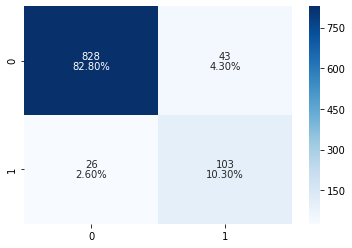


0.8527131782945736
Confusion Matrix test probs: 


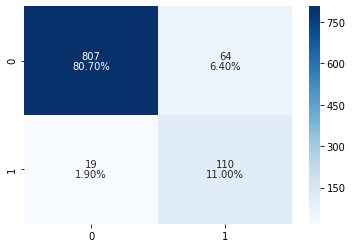


0.8041958041958042
Confusion Matrix test: 


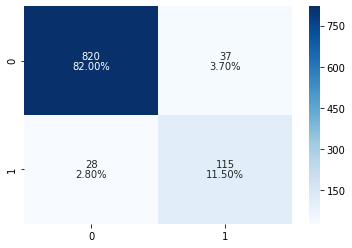


0.8181818181818182
Confusion Matrix test probs: 


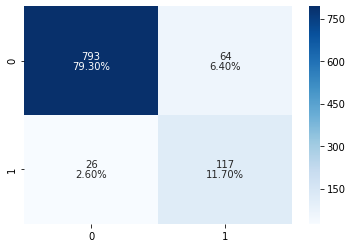


0.7987804878048781
Confusion Matrix test: 


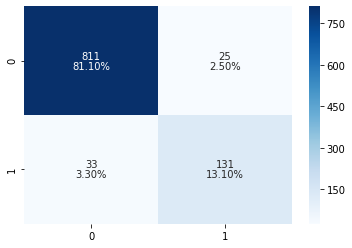


0.8475609756097561
Confusion Matrix test probs: 


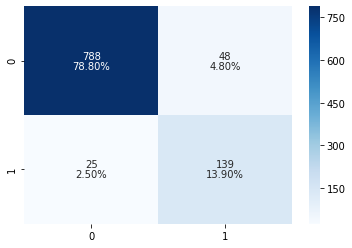


0.7923076923076923
Confusion Matrix test: 


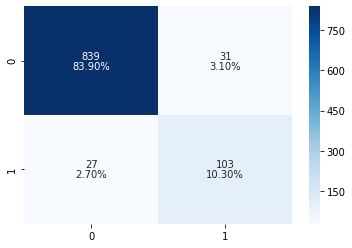


0.8461538461538461
Confusion Matrix test probs: 


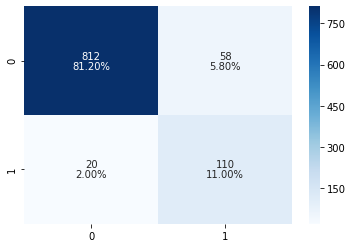


0.8368794326241135
Confusion Matrix test: 


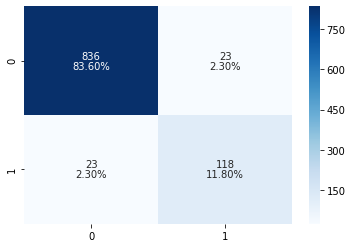


0.8652482269503546
Confusion Matrix test probs: 


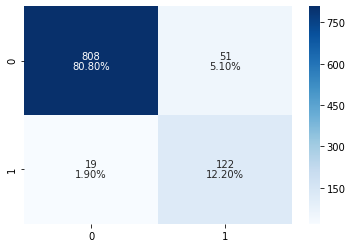

0.8487446750456457 0.8061226058671178 0.8653458441989038 0.8459716090380697


In [118]:
scores = []
train = 0
test = 0
testprobs = 0
trainprobs = 0
for i in range(5):
    smoted_x, smoted_y = sm.fit_sample(X_trains[i], y_trains[i])
    bagreg.fit(smoted_x, smoted_y)
    trainpred = bagreg.predict(X_trains[i])
    testpred = bagreg.predict(X_tests[i])
    train += recall_score(y_trains[i], trainpred)
    test += recall_score(y_tests[i], testpred)
    probs = []
    for a in bagreg.predict_proba(X_tests[i]):
        if a[1] >=.42:
            probs.append(1)
        else:
            probs.append(0)
    probs2 = []
    for a in bagreg.predict_proba(X_trains[i]):
        if a[1] >=.42:
            probs2.append(1)
        else:
            probs2.append(0)
    testprobs += recall_score(y_tests[i], probs)
    trainprobs += recall_score(y_trains[i], probs2)
    scores.append((i, recall_score(y_trains[i], trainpred), recall_score(y_tests[i], testpred), recall_score(y_tests[i], probs), recall_score(y_trains[i], probs2)))
    print(f'\n{recall_score(y_tests[i], testpred)}')
    cm(y_tests[i], testpred)
    print(f'\n{recall_score(y_tests[i], probs)}')
    cm(y_tests[i], probs, t='test probs')
print(train/5, test/5, trainprobs/5, testprobs/5)

In [119]:
scores

[(0,
  0.8477508650519031,
  0.7984496124031008,
  0.8527131782945736,
  0.8633217993079585),
 (1,
  0.8563829787234043,
  0.8041958041958042,
  0.8181818181818182,
  0.875886524822695),
 (2,
  0.85451197053407,
  0.7987804878048781,
  0.8475609756097561,
  0.8692449355432781),
 (3,
  0.8405545927209706,
  0.7923076923076923,
  0.8461538461538461,
  0.8596187175043327),
 (4,
  0.8445229681978799,
  0.8368794326241135,
  0.8652482269503546,
  0.8586572438162544)]

In [120]:
skf = StratifiedKFold(n_splits=5)

In [121]:
for train_index, test_index in skf.split(X, y):
    print(len(train_index), len(test_index))

3999 1001
3999 1001
4000 1000
4001 999
4001 999


In [122]:
X_trains2 = {}
X_tests2 = {}
y_trains2 = {}
y_tests2 = {}
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(i)
    print(train_index)
    X_trains2[i] = X.loc[train_index]
    X_tests2[i] = X.loc[test_index]
    y_trains2[i] = y[train_index]
    y_tests2[i] = y[test_index]

0
[ 988  989  990 ... 4997 4998 4999]
1
[   0    1    2 ... 4997 4998 4999]
2
[   0    1    2 ... 4997 4998 4999]
3
[   0    1    2 ... 4997 4998 4999]
4
[   0    1    2 ... 3998 3999 4000]


In [123]:
sum(X_trains2[0].index == X_trains2[1].index)

2892


0.7816901408450704
Confusion Matrix test: 


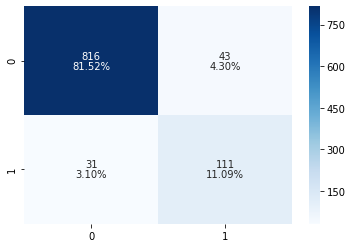


0.8380281690140845
Confusion Matrix test probs: 


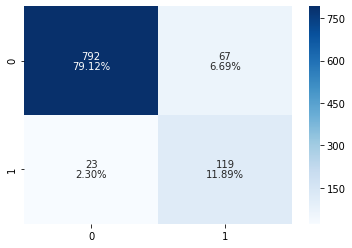


0.8309859154929577
Confusion Matrix test: 


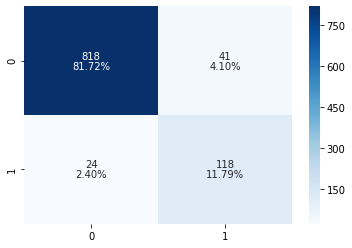


0.8450704225352113
Confusion Matrix test probs: 


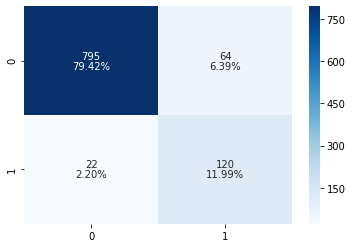


0.7801418439716312
Confusion Matrix test: 


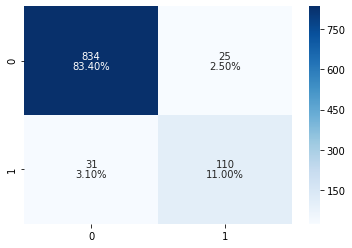


0.8297872340425532
Confusion Matrix test probs: 


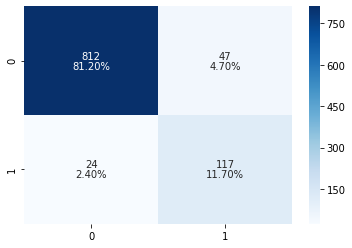


0.7801418439716312
Confusion Matrix test: 


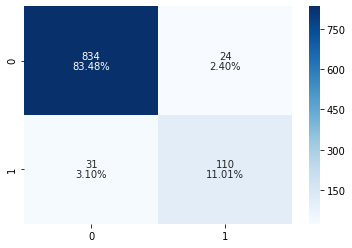


0.8226950354609929
Confusion Matrix test probs: 


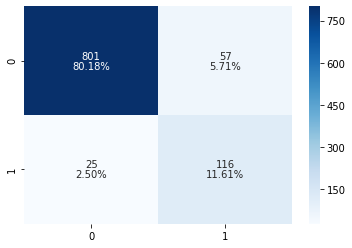


0.8368794326241135
Confusion Matrix test: 


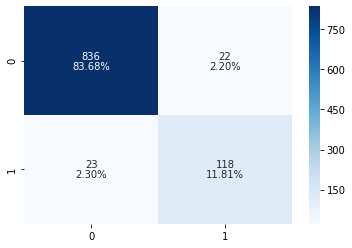


0.8723404255319149
Confusion Matrix test probs: 


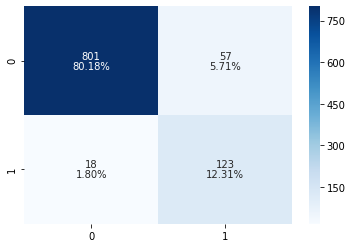

0.8525469839582225 0.8019678353810807 0.8642171424997654 0.8415842573169513


In [124]:
scores2 = []
train = 0
test = 0
testprobs = 0
trainprobs = 0
for i in range(5):
    smoted_x, smoted_y = sm.fit_sample(X_trains2[i], y_trains2[i])
    bagreg.fit(smoted_x, smoted_y)
    trainpred = bagreg.predict(X_trains2[i])
    testpred = bagreg.predict(X_tests2[i])
    train += recall_score(y_trains2[i], trainpred)
    test += recall_score(y_tests2[i], testpred)
    probs = []
    for a in bagreg.predict_proba(X_tests2[i]):
        if a[1] >=.42:
            probs.append(1)
        else:
            probs.append(0)
    probs2 = []
    for a in bagreg.predict_proba(X_trains2[i]):
        if a[1] >=.42:
            probs2.append(1)
        else:
            probs2.append(0)
    testprobs += recall_score(y_tests2[i], probs)
    trainprobs += recall_score(y_trains2[i], probs2
                              )
    scores2.append((i, recall_score(y_trains2[i], trainpred), recall_score(y_tests2[i], testpred), recall_score(y_tests2[i], probs), recall_score(y_trains2[i], probs2)))
    print(f'\n{recall_score(y_tests2[i], testpred)}')
    cm(y_tests2[i], testpred)
    print(f'\n{recall_score(y_tests2[i], probs)}')
    cm(y_tests2[i], probs, t='test probs')
print(train/5, test/5, trainprobs/5, testprobs/5)

In [125]:
scores2

[(0,
  0.856637168141593,
  0.7816901408450704,
  0.8380281690140845,
  0.863716814159292),
 (1,
  0.8513274336283185,
  0.8309859154929577,
  0.8450704225352113,
  0.8707964601769912),
 (2,
  0.8639575971731449,
  0.7801418439716312,
  0.8297872340425532,
  0.872791519434629),
 (3,
  0.842756183745583,
  0.7801418439716312,
  0.8226950354609929,
  0.8551236749116607),
 (4,
  0.8480565371024735,
  0.8368794326241135,
  0.8723404255319149,
  0.8586572438162544)]

Checking feature importance

In [126]:
importance = rf2.feature_importances_

In [127]:
importance

array([0.01583472, 0.01091478, 0.05929339, 0.19769041, 0.05714588,
       0.02932967, 0.13589403, 0.00789438, 0.11512437, 0.04694892,
       0.00752963, 0.04204829, 0.01934651, 0.00754388, 0.01759026,
       0.0164017 , 0.03831744, 0.01808539, 0.15706634])

In [128]:
importdf = pd.DataFrame(importance)
importdf['columns'] = X.columns
importdf.sort_values(by=[0], ascending=False)

,0,columns
3,0.197690,international_plan
18,0.157066,number_customer_service_calls
6,0.135894,total_day_minutes
8,0.115124,total_day_charge
2,0.059293,area_code
4,0.057146,voice_mail_plan
9,0.046949,total_eve_minutes
11,0.042048,total_eve_charge
16,0.038317,total_intl_calls
5,0.029330,number_vmail_messages


In [211]:
X_trainim = X_train.drop(['total_night_calls', 'total_eve_calls', 'account_length', 'total_day_calls'], axis=1)
X_testim = X_test.drop(['total_night_calls', 'total_eve_calls', 'account_length', 'total_day_calls'], axis=1)

In [130]:
smoted_xim, smoted_yim = sm.fit_sample(X_trainim, y_train)

In [131]:
clfim = RandomForestClassifier()
param_gridim = {
    "n_estimators": [10,50,100],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_leaf": [10, 11, 12, 15],
    "min_impurity_decrease": [.0001, .001, .01, .1]
}
gs_treeim = GridSearchCV(clfim, param_gridim, cv=5, scoring='recall',  n_jobs=-1, verbose=2)
gs_treeim.fit(smoted_xim, smoted_yim)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  3.0min finished
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 10], 'min_samples_leaf': [10, 11, 12, 15], 'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [132]:
rf_gsim = pd.DataFrame(gs_treeim.cv_results_)
rf_gsim.head()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054600,0.006860,0.004600,0.000490,gini,1,0.0001,10,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.659382,0.091040,333,0.657559,0.792350,0.528041,0.646031,0.683904,0.661577,0.084486
1,0.379197,0.045477,0.013601,0.000490,gini,1,0.0001,10,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.802739,0.042976,170,0.826594,0.758106,0.790969,0.810998,0.834669,0.804267,0.027480
2,0.739197,0.148217,0.042401,0.013500,gini,1,0.0001,10,100,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.741550,0.049725,255,0.809472,0.724954,0.800437,0.672979,0.721413,0.745851,0.051714
3,0.094200,0.022554,0.011200,0.012923,gini,1,0.0001,11,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.732809,0.061396,263,0.790528,0.663752,0.774217,0.637291,0.783685,0.729895,0.065551
4,0.390396,0.087336,0.027601,0.014814,gini,1,0.0001,11,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.739802,0.093266,256,0.697632,0.657559,0.828842,0.708667,0.810998,0.740740,0.067088


In [133]:
rf_gsim.sort_values(by=['mean_test_score'], ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
142,0.389198,0.087567,0.030800,0.014674,gini,5,0.1,15,50,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
151,0.953398,0.144266,0.026001,0.007923,gini,10,0.0001,12,50,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.911422,0.040063,2,0.945355,0.926412,0.922068,0.915513,0.925710,0.927012,0.009952
155,1.902400,0.292288,0.050201,0.009063,gini,10,0.0001,15,100,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.911131,0.034529,3,0.934426,0.918397,0.918791,0.914421,0.927531,0.922713,0.007255
146,1.721998,0.208784,0.050000,0.008000,gini,10,0.0001,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.911131,0.038268,3,0.943534,0.922040,0.923525,0.918791,0.928623,0.927303,0.008713
352,1.365396,0.234253,0.024000,0.006324,entropy,10,0.001,11,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.910839,0.038432,5,0.945355,0.923862,0.916606,0.910415,0.925346,0.924317,0.011803


In [134]:
gs_treeim.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 15,
 'n_estimators': 50}

In [161]:
gs_treeim.best_score_

1.0

In [162]:
rf4 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=10, min_impurity_decrease=.0001, min_samples_leaf=10)
rf4.fit(smoted_xim, smoted_yim)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [163]:
trainpredim = rf4.predict(X_trainim)
testpredim = rf4.predict(X_testim)

Confusion Matrix test: 


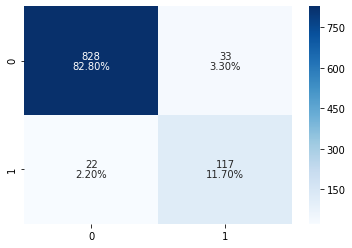

In [164]:
cm(y_test, testpredim)

Confusion Matrix train: 


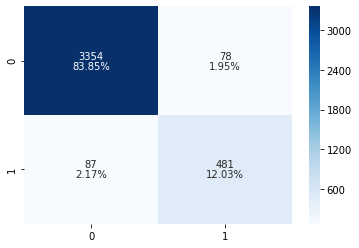

In [165]:
cm(y_train, trainpredim, t='train')

In [166]:
indicesim = []
for i, true, pred in zip(y_test.index, y_test.values, testpredim):
    if pred == 0 and true == 1:
        indicesim.append(i)

In [167]:
fn_probsim = rf4.predict_proba(X_testim.loc[indicesim])[:, 1]
print(sorted(fn_probsim))

[0.030180950428630032, 0.05581399585092691, 0.05902125817023873, 0.07773271900175224, 0.08297947308858973, 0.08528241531411102, 0.08748931158765004, 0.0894338537917249, 0.09065095521511714, 0.09191953484803765, 0.09405427717467785, 0.1127459364124967, 0.1315608118900942, 0.1406972483888761, 0.182585802317528, 0.18806740629903992, 0.19589472669672603, 0.21768059894485375, 0.3544863745762331, 0.3724515358024394, 0.4513808291133745, 0.47413683934626294]


In [172]:
probsim = []
for a in rf4.predict_proba(X_testim):
    if a[1] >=.45:
        probsim.append(1)
    else:
        probsim.append(0)

Confusion Matrix test: 


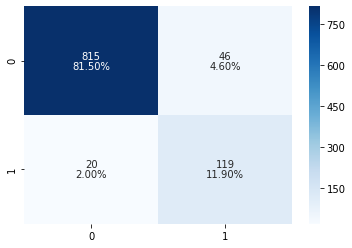

In [173]:
cm(y_test, probsim)

In [174]:
probsimtr = []
for a in rf4.predict_proba(X_trainim):
    if a[1] >=.45:
        probsimtr.append(1)
    else:
        probsimtr.append(0)

Confusion Matrix train: 


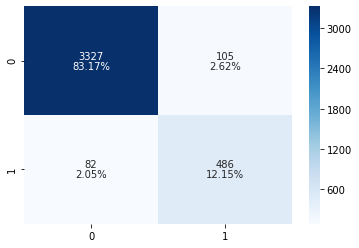

In [175]:
cm(y_train, probsimtr, t = 'train')

In [176]:
bagregim = BaggingClassifier(base_estimator=rf4, n_jobs=-1, n_estimators=50)

In [177]:
bagregim.fit(smoted_xim, smoted_yim)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [178]:
train_predbim = bagregim.predict(X_trainim)
test_predbim = bagregim.predict(X_testim)

Confusion Matrix test: 


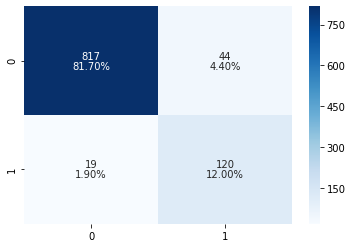

In [179]:
cm(y_test, test_predbim)

Confusion Matrix train: 


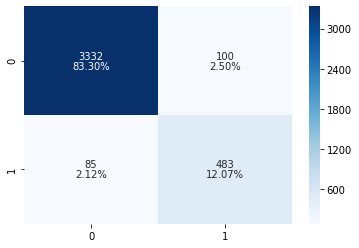

In [180]:
cm(y_train, train_predbim, t='train')

In [181]:
indicesbim = []
for i, true, pred in zip(y_test.index, y_test.values, test_predbim):
    if pred == 0 and true == 1:
        indicesbim.append(i)

In [182]:
fn_probsbim = bagregim.predict_proba(X_testim.loc[indicesbim])[:, 1]
print(sorted(fn_probsbim))

[0.04089169135206306, 0.07195804723078968, 0.07447553198145768, 0.08560217335912729, 0.08583559219332923, 0.08899767944895169, 0.0939962546574274, 0.09614447556346734, 0.09647504149413182, 0.10657197583494936, 0.12945949011476338, 0.13346975511492826, 0.14777054478753146, 0.15458312677163835, 0.17960077019834864, 0.18384941934926288, 0.20303375207581503, 0.29630109951976275, 0.4486904761706296]


In [183]:
probsim = []
for a in bagregim.predict_proba(X_testim):
    if a[1] >=.44:
        probsim.append(1)
    else:
        probsim.append(0)

Confusion Matrix test: 


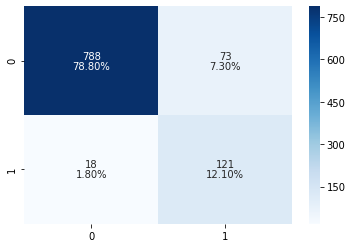

In [184]:
cm(y_test, probsim)

In [185]:
probsimtr = []
for a in bagregim.predict_proba(X_trainim):
    if a[1] >=.41:
        probsimtr.append(1)
    else:
        probsimtr.append(0)

Confusion Matrix train: 


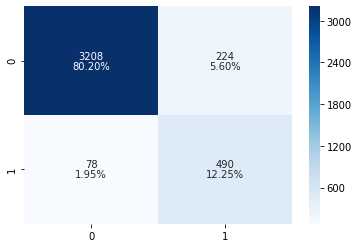

In [186]:
cm(y_train, probsimtr, t = 'train')

In [188]:
rf4.feature_importances_

array([0.01563823, 0.03739505, 0.21757029, 0.05374868, 0.03087102,
       0.14812747, 0.11695263, 0.04179854, 0.03741955, 0.0177939 ,
       0.01808864, 0.0155658 , 0.05179917, 0.01575695, 0.18147408])

In [212]:
importdf2 = pd.DataFrame(rf4.feature_importances_)
importdf2['columns'] = X_trainim.columns
importdf2.sort_values(by=[0], ascending=False)

,0,columns
2,0.217570,international_plan
14,0.181474,number_customer_service_calls
5,0.148127,total_day_minutes
6,0.116953,total_day_charge
3,0.053749,voice_mail_plan
12,0.051799,total_intl_calls
7,0.041799,total_eve_minutes
8,0.037420,total_eve_charge
1,0.037395,area_code
4,0.030871,number_vmail_messages


In [327]:
X_trainim = X_train.drop(['total_day_charge', 'total_eve_charge', 'total_intl_charge', 'total_night_charge', 'total_night_calls', 'total_intl_calls', 'total_eve_calls', 'total_day_calls'], axis=1)
X_testim = X_test.drop(['total_day_charge', 'total_eve_charge', 'total_intl_charge', 'total_night_charge', 'total_night_calls', 'total_intl_calls', 'total_eve_calls', 'total_day_calls'], axis=1)

In [328]:
X_trainim = X_trainim.drop(['state', 'account_length', 'area_code'], axis = 1)
X_testim = X_testim.drop(['state', 'account_length', 'area_code'], axis = 1)

In [329]:
X_trainim['combined_charges'] = X_train['total_day_charge'] + X_train['total_eve_charge'] + X_train['total_intl_charge'] + X_train['total_night_charge']
X_testim['combined_charges'] = X_test['total_day_charge'] + X_test['total_eve_charge'] + X_test['total_intl_charge'] + X_test['total_night_charge']

In [330]:
X_trainim['total_min'] = X_train['total_day_minutes'] + X_train['total_eve_minutes'] + X_train['total_intl_minutes'] + X_train['total_night_minutes']
X_testim['total_min'] = X_test['total_day_minutes'] + X_test['total_eve_minutes'] + X_test['total_intl_minutes'] + X_test['total_night_minutes']

In [331]:
X_trainim = X_trainim.drop(['total_day_minutes', 'total_eve_minutes', 'total_intl_minutes', 'total_night_minutes'], axis = 1)
X_testim = X_testim.drop(['total_day_minutes', 'total_eve_minutes', 'total_intl_minutes', 'total_night_minutes'], axis = 1)

In [385]:
X_trainim = X_trainim.drop(['total_min', 'number_vmail_messages'], axis = 1)
X_testim = X_testim.drop(['total_min', 'number_vmail_messages'], axis = 1)

In [386]:
smoted_xim, smoted_yim = sm.fit_sample(X_trainim, y_train)

In [387]:
clfim = RandomForestClassifier()
param_gridim = {
    "n_estimators": [10,50,100],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_leaf": [8, 10, 12, 14],
    "min_impurity_decrease": [.0001, .001, .01, .1]
}
gs_treeim = GridSearchCV(clfim, param_gridim, cv=5, scoring='recall',  n_jobs=-1, verbose=2)
gs_treeim.fit(smoted_xim, smoted_yim)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 10], 'min_samples_leaf': [8, 10, 12, 14], 'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [388]:
rf_gsim = pd.DataFrame(gs_treeim.cv_results_)
rf_gsim.head()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053402,0.010984,0.005399,1.852945e-03,gini,1,0.0001,8,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.626166,0.174049,329,0.469217,0.471038,0.567007,0.701020,0.908594,0.623375,0.165848
1,0.250599,0.008454,0.014002,8.969322e-04,gini,1,0.0001,8,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.652681,0.092495,313,0.705282,0.702368,0.467589,0.701020,0.703933,0.656038,0.094236
2,0.480797,0.055562,0.031199,6.553817e-03,gini,1,0.0001,8,100,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.702214,0.008605,265,0.704918,0.702368,0.698835,0.701020,0.703933,0.702215,0.002151
3,0.037799,0.000980,0.004000,4.523674e-07,gini,1,0.0001,10,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.740385,0.091720,259,0.704918,0.678689,0.698471,0.700655,0.908594,0.738265,0.085641
4,0.204002,0.026965,0.012396,4.916739e-04,gini,1,0.0001,10,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.702214,0.008605,265,0.704918,0.702368,0.698835,0.701020,0.703933,0.702215,0.002151


In [389]:
rf_gsim.sort_values(by=['mean_test_score'], ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
348,0.112398,0.005235,0.005401,0.000800,entropy,10,0.001,8,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.923660,0.037000,1,0.944991,0.925683,0.920612,0.923889,0.928988,0.928833,0.008521
146,0.819598,0.116792,0.036201,0.002561,gini,10,0.0001,8,100,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.923368,0.045582,2,0.944262,0.929690,0.932993,0.932629,0.929716,0.933858,0.005386
145,0.385398,0.026143,0.019602,0.002871,gini,10,0.0001,8,50,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.922203,0.048221,3,0.945355,0.929690,0.938092,0.929716,0.926803,0.933931,0.006847
349,0.428400,0.053688,0.016800,0.000748,entropy,10,0.001,8,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.921620,0.042087,4,0.947541,0.923133,0.928259,0.931173,0.927895,0.931600,0.008377
352,0.418998,0.042081,0.018401,0.002728,entropy,10,0.001,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.921329,0.040221,5,0.940619,0.926412,0.924982,0.926438,0.925346,0.928759,0.005958


In [390]:
gs_treeim.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 8,
 'n_estimators': 10}

In [391]:
rf5 = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=10, min_impurity_decrease=.001, min_samples_leaf=8)
rf5.fit(smoted_xim, smoted_yim)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [392]:
trainpredim = rf5.predict(X_trainim)
testpredim = rf5.predict(X_testim)

Confusion Matrix test: 


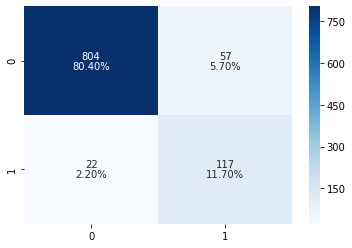

In [393]:
cm(y_test, testpredim)

Confusion Matrix train: 


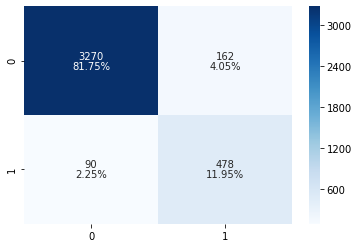

In [394]:
cm(y_train, trainpredim, t='train')

In [395]:
indicesim = []
for i, true, pred in zip(y_test.index, y_test.values, testpredim):
    if pred == 0 and true == 1:
        indicesim.append(i)

In [396]:
fn_probsim = rf5.predict_proba(X_testim.loc[indicesim])[:, 1]
print(sorted(fn_probsim))

[0.020916603939313373, 0.021876606982469488, 0.029063930129045606, 0.0318919031499067, 0.03231660110608445, 0.035892456948566534, 0.057780058470493924, 0.057780058470493924, 0.06994133429010534, 0.07289776397302253, 0.07901668339164004, 0.08358036207684019, 0.08696219875410445, 0.09351388485507453, 0.09740634733659853, 0.09846201069703107, 0.1835051866536925, 0.42487626525799627, 0.42487626525799627, 0.42487626525799627, 0.42487626525799627, 0.453037277326375]


In [397]:
probsim = []
for a in rf5.predict_proba(X_testim):
    if a[1] >=.4:
        probsim.append(1)
    else:
        probsim.append(0)

Confusion Matrix test: 


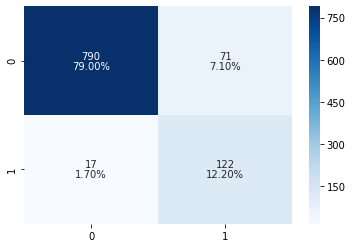

In [398]:
cm(y_test, probsim)

In [399]:
probsimtr = []
for a in rf5.predict_proba(X_trainim):
    if a[1] >=.4:
        probsimtr.append(1)
    else:
        probsimtr.append(0)

Confusion Matrix train: 


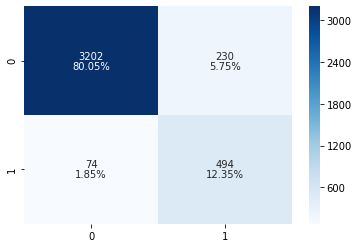

In [400]:
cm(y_train, probsimtr, t = 'train')

In [401]:
print(classification_report(y_test, probsim))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       861
           1       0.63      0.88      0.73       139

   micro avg       0.91      0.91      0.91      1000
   macro avg       0.81      0.90      0.84      1000
weighted avg       0.93      0.91      0.92      1000



In [402]:
print(classification_report(y_test, testpredim))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       861
           1       0.67      0.84      0.75       139

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.82      0.89      0.85      1000
weighted avg       0.93      0.92      0.92      1000



In [403]:
importdf2 = pd.DataFrame(rf5.feature_importances_)
importdf2['columns'] = X_trainim.columns
importdf2.sort_values(by=[0], ascending=False)

,0,columns
3,0.447639,combined_charges
2,0.258212,number_customer_service_calls
0,0.197366,international_plan
1,0.096782,voice_mail_plan


In [404]:
bagregim = BaggingClassifier(base_estimator=rf5, n_jobs=-1, n_estimators=50)

In [405]:
bagregim.fit(smoted_xim, smoted_yim)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [406]:
train_predbim = bagregim.predict(X_trainim)
test_predbim = bagregim.predict(X_testim)

Confusion Matrix test: 


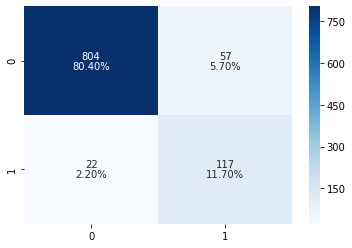

In [407]:
cm(y_test, test_predbim)

Confusion Matrix train: 


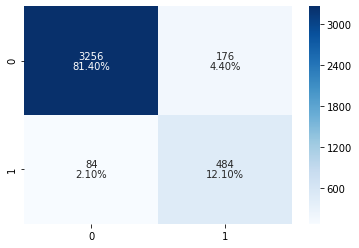

In [408]:
cm(y_train, train_predbim, t='train')

In [409]:
print(classification_report(y_test, test_predbim))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       861
           1       0.67      0.84      0.75       139

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.82      0.89      0.85      1000
weighted avg       0.93      0.92      0.92      1000



In [410]:
test = pd.concat([X_trainim, y_train], axis=1) 

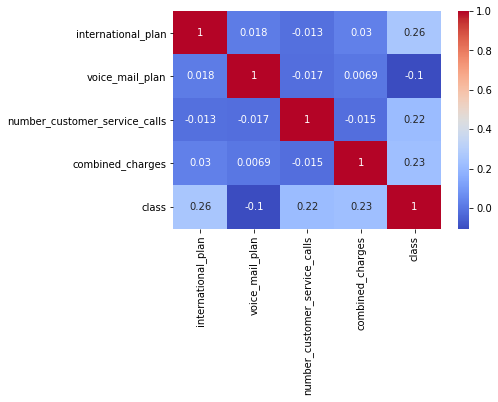

In [411]:
sns.heatmap(test.corr(), cmap='coolwarm', annot=True)

Using PCA to try to optimize the model

In [ ]:
pca = PCA(n_components=8)

In [ ]:
a = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
a

In [ ]:
scores = []
train = 0
test = 0
testprobs = 0
for i in range(8):
    x_train = pca.fit_transform(X_trains[i])
    smoted_x, smoted_y = sm.fit_sample(x_train, y_trains[i])
    bagreg.fit(smoted_x, smoted_y)
    x_test = pca.transform(X_tests[i])
    trainpred = bagreg.predict(x_train)
    testpred = bagreg.predict(x_test)
    train += recall_score(y_trains[i], trainpred)
    test += recall_score(y_tests[i], testpred)
    probs = []
    for a in bagreg.predict_proba(x_test):
        if a[1] >=.42:
            probs.append(1)
        else:
            probs.append(0)
    testprobs += recall_score(y_tests[i], probs)
    scores.append((i, recall_score(y_trains[i], trainpred), recall_score(y_tests[i], testpred), recall_score(y_tests[i], probs)))
print(train/8, test/8, testprobs/8)

In [ ]:
scores

XbBoost

In [ ]:
clf = xgb.XGBClassifier()

In [ ]:
param_grid = {
    "learning_rate": [0.1, .01, .2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [8, 10, 12],
    'subsample': [.6, 0.7, .8],
    'n_estimators': [5, 30, 100, 250],
}

In [ ]:
grid_xb = GridSearchCV(clf, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_xb.fit(X_train_smoted, y_train_smoted)

In [ ]:
xb_gs = pd.DataFrame(grid_xb.cv_results_)
xb_gs.head()

In [ ]:
xb_gs.sort_values(by=['mean_test_score'], ascending=False).head()

In [ ]:
xb_gs['test_train_diff'] = xb_gs['mean_train_score'] - xb_gs['mean_test_score']

In [ ]:
xb_gs['wighted_test'] = xb_gs['mean_test_score'] - xb_gs['test_train_diff']

In [ ]:
xb_gs.sort_values(by=['wighted_test'], ascending=False).drop(['split0_train_score', 'split1_train_score'], axis=1).head()

In [ ]:
grid_xb.best_params_

In [ ]:
xb2 = xgb.XGBClassifier(learning_rate=.2, max_depth=8, min_child_weight=10, n_estimators=30, subsample=.8)

In [ ]:
xsmote = pd.DataFrame(X_train_smoted, columns=X.columns)

In [ ]:
xb2.fit(xsmote, y_train_smoted)

In [ ]:
train_pred3 = xb2.predict(X_train)
train_pred_smoted3 = xb2.predict(xsmote)
test_pred3 = xb2.predict(X_test)

In [ ]:
cm(y_test, test_pred3)

In [ ]:
cm(y_train, train_pred3, t='train')

In [ ]:
cm(y_train_smoted, train_pred_smoted3, t='train_smoted')

In [ ]:
print(classification_report(y_test, test_pred3))

In [ ]:
print(classification_report(y_train, train_pred3))

SVM

In [ ]:
# clfsvm = svm.SVC()

In [ ]:
params_svm = [{'kernel': ['rbf', 'poly'],
         'C': [0.01, 1, 100],
         'degree': [2,3,4,5],
         'gamma': [0.001, 0.01]}]

In [ ]:
gs_svm = GridSearchCV(clfsvm, params_svm, cv=5, scoring='recall',  n_jobs=-1, verbose=2)
gs_svm.fit(X_train_smoted, y_train_smoted)

In [ ]:
svm_gs = pd.DataFrame(gs_svm.cv_results_)
svm_gs.head()

In [ ]:
svm_gs.sort_values(by=['mean_test_score'], ascending=False).head()

In [ ]:
gs_svm.best_params_

In [ ]:
svm2 = svm.SVC(n_estimators=50, criterion='entropy', max_depth=10, min_impurity_decrease=.0001, min_samples_leaf=11)
svm2.fit(X_train_smoted, y_train_smoted)

In [ ]:
2+2